In [1]:
import matplotlib.pyplot as plt
import numpy as np
from custom_sepsis import *

In [2]:
env = TrModelEnv(transition_model())
dqn_TRMod_training = train_dqn(env, 100_000, "Transition_Model_100K")


In [3]:
dqn_TRMod_training.evaluate_policy(100000)

-0.85783

## add history

In [47]:
dqn_training = Training.load("data/trainings/DQN-Test_object.pkl")
dqn_policy = dqn_training.get_policy()
dqn_training.evaluate_policy(10000)

-0.3815

In [40]:
# use a reasonable policy for history
history = [run_episode(dqn_policy) for _ in range(1000)]

In [41]:
state_counts = np.ones((len(STATES), len(ACTIONS), len(STATES)))
for episode in history:
    state_counts = update_state_counts(episode, state_counts)

In [42]:
env = TrModelEnv(transition_model(state_counts))
trmod_hist = train_dqn(env, 100_000, "Transition_Model_History_of_100000")

In [43]:
trmod_hist.evaluate_policy(10000)

-0.7925

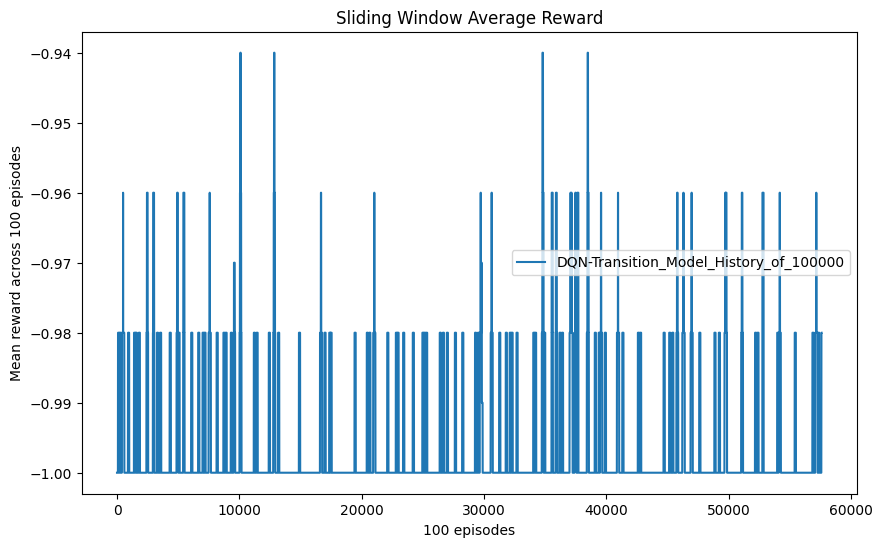

In [44]:
plot_rewards([trmod_hist], len(trmod_hist.episodes), 100)

In [45]:
# compare with value iteration
V = np.zeros(len(STATES))
policy, values = matrix_value_iteration(V, transition_model(state_counts))

In [46]:
evaluate_policy(policy, 10000)


-0.7551